## Plot interactions

In [196]:
from matplotlib import pyplot as plt
import pandas as pd

In [197]:


def bar_plot(data, title='Performance for observation', resource_name='test.png'):
    plt.figure()
    plt.style.use('ggplot')
    data.plot(kind='bar')
    plt.title(title)
    plt.ylabel('Balanced accuracy')
    plt.xlabel('Dataset')
    plt.axhline(y = 0.5, color = 'dimgrey', linestyle = '--', linewidth=1)
    plt.gca().set_facecolor('w')
    plt.gca().set_ylim([0, 1])
    plt.grid(color='lightgray', linestyle='--', linewidth=1)
    indices = range(data.shape[0])
    labels = data[0].to_list()
    plt.subplots_adjust(bottom=0.35)
    plt.xticks(indices, labels, rotation=90)
    legend = ['Random forest', 'Logistic Regression']
    plt.legend(loc='lower right')
    plt.savefig('paper_plot_fig/'+ resource_name)


phases = ['interaction', 'embedding']

def load_and_plot(step):
    # age
    age_rf = pd.read_csv('paper_plot_sample/' + step + 's/age_inference_random-forest.csv', header=None)
    age_lr = pd.read_csv('paper_plot_sample/' + step + 's/age_inference_logistic-regression.csv', header=None)

    #gender
    gender_rf = pd.read_csv('paper_plot_sample/' + step + 's/gender_inference_random-forest.csv', header=None)
    gender_lr = pd.read_csv('paper_plot_sample/' + step + 's/gender_inference_logistic-regression.csv', header=None)

    age_df = age_rf.merge(age_lr, on=0)
    age_df.rename(columns={'1_x': 'Random Forest', '1_y': 'Logistic Regression'}, inplace=True)
    gender_df = gender_rf.merge(gender_lr, on=0)
    gender_df.rename(columns={'1_x': 'Random Forest', '1_y': 'Logistic Regression'}, inplace=True)

    bar_plot(age_df, title='Age inference, ' + step + ' step', resource_name=str(step + 's_age.png'))
    bar_plot(gender_df, title='Gender inference, ' + step + ' step', resource_name=str(step + 's_gender.png'))

<Figure size 432x288 with 0 Axes>

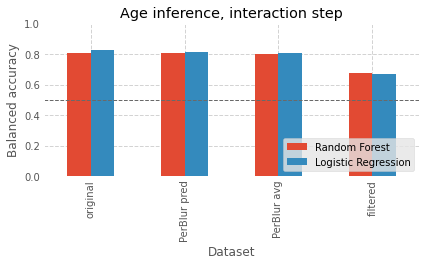

<Figure size 432x288 with 0 Axes>

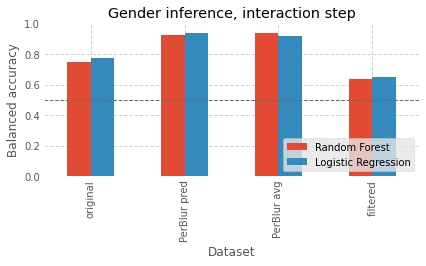

<Figure size 432x288 with 0 Axes>

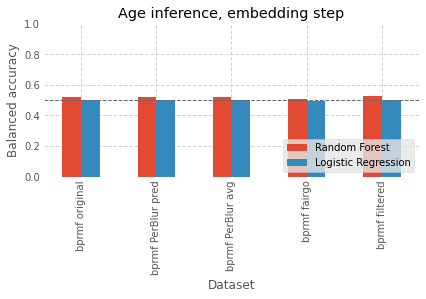

<Figure size 432x288 with 0 Axes>

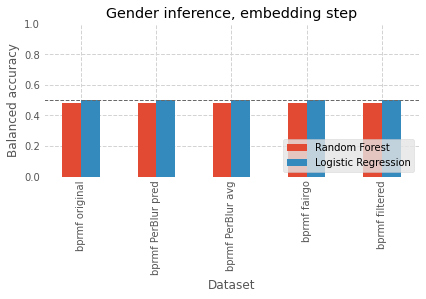

In [198]:
for p in phases:
    load_and_plot(p)